# 1 - Artificial Neural Networks - ANN

1.1 - Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from keras import Sequential

In [ ]:
tf.__version__

'2.6.0'

Preprocessing Phase :

1- Import dataset

2- Seperate X and Y

3- NaNs

4- Encoding Binary data

5- OneHotEncoding Categorical data

6- Train/Test split

7- Feature Scaling

In [ ]:
# Step One
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

FileNotFoundError: ignored

In [ ]:
# Step Two
X=dataset.iloc[:,3:-1].values
X

In [ ]:
Y=dataset.iloc[:,-1].values
Y=Y.reshape(-1,1)
Y

In [ ]:
# Step Three
# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
# imputer.fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])

In [ ]:
# Step Four
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])
X.shape

In [ ]:
# Step Five
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
X.shape

In [ ]:
# Step Six
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# Step Seven
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

1.2 - Building ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann=Sequential()
# first hidden layer
ann.add(Dense(units=6,activation='relu'))
# second hidden layer
ann.add(Dense(units=6,activation='relu'))
# output layer
# classification
ann.add(Dense(units=1,activation='sigmoid'))
# regression
#ann.add(Dense(units=1))

1.3 - Train ANN

In [ ]:
### compiling ANN
# CLASSIFICATION
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# REGRESSION
#ann.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# train ANN
ann.fit(xtrain,ytrain,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6448 - accuracy: 0.6435
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7952
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.7971
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8111
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8220
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8322
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8400
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8481
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8512
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3599 - accura

In [ ]:
# predict using ANN
predict=ann.predict(ss.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))
predict

array([[0.03785431]], dtype=float32)

In [ ]:
ypred=ann.predict(xtest)
ypred

array([[0.18766052],
       [0.31775436],
       [0.1698449 ],
       ...,
       [0.20624089],
       [0.17143753],
       [0.22132495]], dtype=float32)

In [ ]:
# CLASSIFICATION
ypred=ann.predict(xtest)
ypred=(ypred>0.5)
print(np.concatenate((ypred.reshape(len(ypred),1),ytest.reshape(len(ytest),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
# REGRESSION
# ypred=ann.predict(xtest)
# np.set_printoptions(precision=2)
# print(np.concatenate((ypred.reshape(len(ypred),1),ytest.reshape(len(ytest),1)),1))

In [ ]:
# confusion matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred,digits=4))

0.8635
              precision    recall  f1-score   support

           0     0.8847    0.9530    0.9176      1595
           1     0.7340    0.5111    0.6026       405

    accuracy                         0.8635      2000
   macro avg     0.8094    0.7320    0.7601      2000
weighted avg     0.8542    0.8635    0.8538      2000



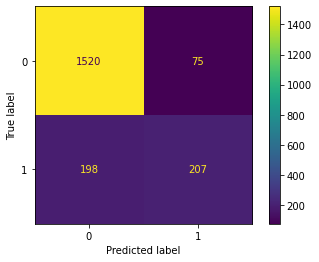

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(ytest,ypred)
cm
disp=ConfusionMatrixDisplay(cm,display_labels=[0,1])
disp.plot(values_format='d')

# 2 - Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
tf.__version__

'2.7.0'

2.1 - Preprocessing



Here you can read more about the ImageDataGenerator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

In [ ]:
# Prerpcessing Train Set
train_datagen=ImageDataGenerator(rescale=1/225,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

training_set = train_datagen.flow_from_directory('data/training_set',target_size=(64, 64),batch_size=32,class_mode='binary')

In [ ]:
# Preprocessing Test Set
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory('data/test_set',target_size=(64, 64),batch_size=32,class_mode='binary')

3.2 - Building CNN

3.2.1 Initialising CNN

In [ ]:
cnn=Sequential()

3.2.2 Convolution

In [ ]:
# Convolutional Layer
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

3.2.3 Pooling

In [ ]:
# Pooling Layer
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
# Add another convolutional layer
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

3.2.4 Flattening

In [ ]:
cnn.add(Flatten())

3.2.5 Fully connection

In [ ]:
cnn.add(Dense(units=128,activation='relu'))

3.2.6 Output Layer

In [ ]:
cnn.add(Dense(units=1,activation='sigmoid'))

3.3 - Training

3.3.1 Compiling CNN

In [ ]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

3.3.2 Training on training set and evaluation on test set

In [ ]:
cnn.fit(x=training_set,validation_data=test_set,epochs=100)

3.4 Predicting new image

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
test_img = image.load_img('datset/image_name',target_size=(64*64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)  # Convert single image to a batch.
# test_img = np.array([test_img])  # Convert single image to a batch.
results = cnn.predict(test_img)

In [ ]:
print(training_set.class_indicies)
if results[0][0]==1:
  prediction='dog'
else:
  prediction='cat'

print(prediction)

# 3 - Recurrent Neural Network - (RNN)

3.1 - Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train=data.iloc[:,1:2].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_sc=sc.fit_transform(train)
len(train_sc)

1258

3.1.1 - Creating a data structure with 60 timesteps and 1output

In [ ]:
xtrain=[]
ytrain=[]
for i in range(60,len(train)):
  xtrain.append(train_sc[i-60:i,0])
  ytrain.append(train_sc[i,0])

xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtrain.shape

(1198, 60)

3.1.2 Reshaping

In [ ]:
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(1198, 60, 1)

3.2 - Builing RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
# Initialize RNN
regressor=Sequential()

# Add first LSTM layer and some droupout regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
regressor.add(Dropout(0.2))

# Add second LSTM layer and some droupout regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Add third LSTM layer and some droupout regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Add Fourth LSTM layer and some droupout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Add output layer
regressor.add(Dense(units=1))

In [ ]:
# Compiling RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

In [ ]:
regressor.fit(xtrain,ytrain,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 29s 113ms/step - loss: 0.0824
Epoch 2/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0045
Epoch 5/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0048
Epoch 13/100

3.3 - Prediction & Visualization

In [ ]:
data_test=pd.read_csv('Google_Stock_Price_Test.csv')
data_test.shape

(20, 6)

In [ ]:
test=data_test.iloc[:,1:2].values
test.shape

(20, 1)

In [ ]:
total=pd.concat((data['Open'][-60:],data_test['Open']),axis=0).values
total=total.reshape(-1,1)


In [ ]:
total=sc.transform(total)


In [ ]:
xtest=[]
for i in range(60,len(total)):
  xtest.append(total[i-60:i,0])
xtest=np.array(xtest)


In [ ]:
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
xtest.shape

(20, 60, 1)

In [ ]:
ypred=regressor.predict(xtest)
ypred=sc.inverse_transform(ypred)

Text(0, 0.5, 'Stock Price')

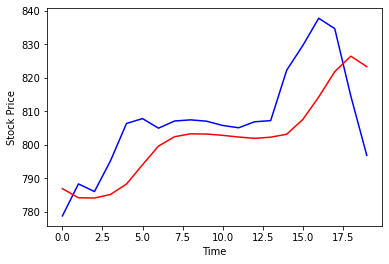

In [ ]:
plt.plot(test,color='blue',label='Real')
plt.plot(ypred,color='red',label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test, ypred))
rmse

12.776213453004063

**here are different ways to improve the RNN model:**

1- Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.


2- Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).

3- Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.

4- Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.

5- Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.

# 4 - Self Organized Maps (SOM)

4.1 - SOM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data1=pd.read_csv('Credit_Card_Applications1.csv')
data1.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
data2=pd.read_csv('Credit_Card_Applications2.csv')


In [ ]:
X=data1.iloc[:,:-1].values
X.shape

(690, 15)

In [ ]:
Y=data1.iloc[:,-1].values
Y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)
X.shape

(690, 15)

4.2 Training SOM

In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=8871974973096631f411b307e8c0114cc135b9af41b43047dd7132ea184e9916
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


In [ ]:
from minisom import MiniSom

In [ ]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1,learning_rate=0.5)

In [ ]:
som.random_weights_init(X)
som.train_random(X,num_iteration=100)

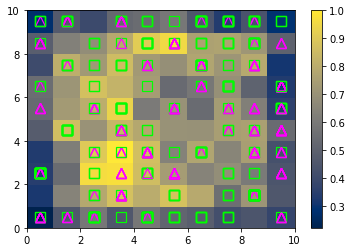

In [ ]:
# Visualizing esults
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T,cmap='cividis')
colorbar()
markers=['s','^']
colors=['lime','magenta']

for i,x in enumerate(X):
  w=som.winner(x)
  plot(w[0]+0.5,w[1]+0.5,markers[Y[i]],
       markeredgecolor=colors[Y[i]],
       markerfacecolor='None',
       markersize=10,markeredgewidth=1.2)

show()

In [ ]:
# Finding the frauds/outliers
mappings=som.win_map(X)


In [ ]:
dist=som.distance_map()
ind_90=[]
for i in range(len(dist)):
  for j in dist[i]:
    if j>0.9:
      ind_90.append((i,np.where(dist[i]==j)[0][0]))

ind_95=[]
for i in range(len(dist)):
  for j in dist[i]:
    if j>0.95:
      ind_95.append((i,np.where(dist[i]==j)[0][0]))
      
ind_100=[]
for i in range(len(dist)):
  for j in dist[i]:
    if j==1:
      ind_100.append((i,np.where(dist[i]==j)[0][0]))

In [ ]:
outliers_90=[]
for i in ind_90:
  for j in mappings[i]:
    outliers_90.append(list(j))
outliers_90=sc.inverse_transform(outliers_90)

frauds_90=pd.DataFrame(outliers_90)
frauds_90

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15570508.0,0.0,51.92,6.500,2.0,3.0,5.0,3.085,0.0,0.0,0.0,1.0,2.0,73.0,1.0
1,15641733.0,0.0,50.25,0.835,2.0,6.0,4.0,0.500,0.0,0.0,0.0,1.0,2.0,240.0,118.0
2,15641007.0,0.0,25.25,12.500,2.0,2.0,4.0,1.000,0.0,0.0,0.0,1.0,2.0,180.0,1063.0
3,15684512.0,1.0,42.50,4.915,1.0,9.0,4.0,3.165,1.0,0.0,0.0,1.0,2.0,52.0,1443.0
4,15740458.0,1.0,23.33,11.625,1.0,9.0,4.0,0.835,1.0,0.0,0.0,1.0,2.0,160.0,301.0
5,15790630.0,1.0,37.50,1.750,1.0,8.0,5.0,0.250,1.0,0.0,0.0,1.0,2.0,164.0,401.0
6,15674583.0,1.0,28.75,1.500,1.0,8.0,4.0,1.500,1.0,0.0,0.0,1.0,2.0,0.0,226.0
7,15757467.0,0.0,52.83,15.000,2.0,8.0,4.0,5.500,1.0,1.0,14.0,0.0,2.0,0.0,2201.0
8,15815443.0,0.0,57.08,19.500,2.0,8.0,4.0,5.500,1.0,1.0,7.0,0.0,2.0,0.0,3001.0
9,15748432.0,0.0,58.33,10.000,2.0,11.0,4.0,4.000,1.0,1.0,14.0,0.0,2.0,0.0,1603.0


In [ ]:
outliers_95=[]
for i in ind_95:
  for j in mappings[i]:
    outliers_95.append(list(j))
outliers_95=sc.inverse_transform(outliers_95)

frauds_95=pd.DataFrame(outliers_95)
frauds_95

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15570508.0,0.0,51.92,6.500,2.0,3.0,5.0,3.085,0.0,0.0,0.0,1.0,2.0,73.0,1.0
1,15641733.0,0.0,50.25,0.835,2.0,6.0,4.0,0.500,0.0,0.0,0.0,1.0,2.0,240.0,118.0
2,15641007.0,0.0,25.25,12.500,2.0,2.0,4.0,1.000,0.0,0.0,0.0,1.0,2.0,180.0,1063.0
3,15757467.0,0.0,52.83,15.000,2.0,8.0,4.0,5.500,1.0,1.0,14.0,0.0,2.0,0.0,2201.0
4,15815443.0,0.0,57.08,19.500,2.0,8.0,4.0,5.500,1.0,1.0,7.0,0.0,2.0,0.0,3001.0
5,15748432.0,0.0,58.33,10.000,2.0,11.0,4.0,4.000,1.0,1.0,14.0,0.0,2.0,0.0,1603.0
6,15696287.0,0.0,58.42,21.000,2.0,3.0,5.0,10.000,1.0,1.0,13.0,0.0,2.0,0.0,6701.0
7,15698749.0,0.0,56.50,16.000,2.0,5.0,1.0,0.000,1.0,1.0,15.0,0.0,2.0,0.0,248.0
8,15773776.0,0.0,35.42,12.000,2.0,11.0,8.0,14.000,1.0,1.0,8.0,0.0,2.0,0.0,6591.0
9,15800049.0,1.0,23.08,11.500,2.0,3.0,4.0,3.500,1.0,1.0,9.0,0.0,2.0,56.0,743.0


In [ ]:
dist=som.distance_map()

outliers_100=[]

for i in ind_100:
  for j in mappings[i]:
    outliers_100.append(list(j))
outliers_100=sc.inverse_transform(outliers_100)

frauds_100=pd.DataFrame(outliers_100)
frauds_100

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15800049.0,1.0,23.08,11.5,2.0,3.0,4.0,3.5,1.0,1.0,9.0,0.0,2.0,56.0,743.0
1,15593694.0,1.0,55.92,11.5,2.0,1.0,1.0,5.0,1.0,1.0,5.0,0.0,2.0,0.0,8852.0
2,15785367.0,1.0,51.33,10.0,2.0,3.0,5.0,0.0,1.0,1.0,11.0,0.0,2.0,0.0,1250.0
3,15781574.0,1.0,49.58,19.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,94.0,1.0


4.2 - Hybrid deep learning model

4.2.1 - Outliers with SOM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data1=pd.read_csv('Credit_Card_Applications1.csv')
data1.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
X=data1.iloc[:,:-1].values
Y=data1.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)
X.shape

(690, 15)

In [ ]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X,num_iteration=100)

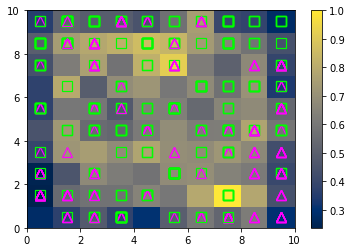

In [ ]:
# Visualizing esults
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T,cmap='cividis')
colorbar()
markers=['s','^']
colors=['lime','magenta']

for i,x in enumerate(X):
  w=som.winner(x)
  plot(w[0]+0.5,w[1]+0.5,markers[Y[i]],
       markeredgecolor=colors[Y[i]],
       markerfacecolor='None',
       markersize=10,markeredgewidth=1.2)

show()

In [ ]:
dist=som.distance_map()
ind_100=[]
for i in range(len(dist)):
  for j in dist[i]:
    if j>0.90:
      ind_100.append((i,np.where(dist[i]==j)[0][0]))
ind_100


[(1, 4), (5, 1), (7, 7), (8, 6)]

In [ ]:
mappings=som.win_map(X)

outliers_100=[]
for i in ind_100:
  for j in mappings[i]:
    outliers_100.append(list(j))
outliers_100

[[0.8830492253602955,
  0.0,
  0.08150375939849627,
  0.02089285714285714,
  0.0,
  0.38461538461538464,
  0.375,
  0.02052631578947368,
  1.0,
  0.0,
  0.0,
  1.0,
  0.5,
  0.08,
  0.0],
 [0.8074512771844695,
  0.0,
  0.5425563909774436,
  0.48517857142857146,
  0.5,
  0.23076923076923078,
  0.875,
  0.2982456140350877,
  1.0,
  0.0,
  0.0,
  1.0,
  0.5,
  0.0,
  0.0],
 [0.00850922399882137,
  0.0,
  0.22300751879699246,
  0.12642857142857142,
  0.5,
  0.15384615384615385,
  0.5,
  0.017543859649122806,
  1.0,
  0.0,
  0.0,
  1.0,
  0.5,
  0.0855,
  0.0],
 [0.05553620124214831,
  0.0,
  0.17037593984962404,
  0.0907142857142857,
  0.0,
  0.38461538461538464,
  0.375,
  0.008771929824561403,
  1.0,
  0.0,
  0.0,
  1.0,
  0.5,
  0.185,
  0.0],
 [0.3068205935233834,
  0.0,
  0.651578947368421,
  0.011964285714285714,
  0.5,
  0.15384615384615385,
  0.5,
  0.03508771929824561,
  1.0,
  0.0,
  0.0,
  1.0,
  0.5,
  0.126,
  0.021970000000000003],
 [0.6998506380916965,
  0.0,
  0.53007518796

In [ ]:
outliers_100=sc.inverse_transform(outliers_100)

frauds_100=pd.DataFrame(outliers_100)
frauds_100[0]=frauds_100[0].astype('int64')
outliers_100

array([[1.5786237e+07, 0.0000000e+00, 1.9170000e+01, 5.8500000e-01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.8500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5767358e+07, 0.0000000e+00, 4.9830000e+01, 1.3585000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5567839e+07, 0.0000000e+00, 2.8580000e+01, 3.5400000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 5.0000000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.7100000e+02, 1.0000000e+00],
       [1.5579583e+07, 0.0000000e+00, 2.5080000e+01, 2.5400000e+00,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 2.5000000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

4.2.2 - Unsupervised combined with supervised DL

In [ ]:
# Creating the matrix of features
customers=data1.iloc[:,1:].values

# Creating dependent variable
is_fraud=np.zeros(len(data1))

In [ ]:
outliers_100

array([[1.5786237e+07, 0.0000000e+00, 1.9170000e+01, 5.8500000e-01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.8500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5767358e+07, 0.0000000e+00, 4.9830000e+01, 1.3585000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5567839e+07, 0.0000000e+00, 2.8580000e+01, 3.5400000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 5.0000000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.7100000e+02, 1.0000000e+00],
       [1.5579583e+07, 0.0000000e+00, 2.5080000e+01, 2.5400000e+00,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 2.5000000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [ ]:
for i in range(len(data1)):
  if data1.iloc[i,0] in outliers_100:
    is_fraud[i]=1
is_fraud.sum()

46.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
customers=sc.fit_transform(customers)

4.2.2 - ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
clf=Sequential()
# first hidden layer
clf.add(Dense(units=3,activation='relu',kernel_initializer='uniform',input_dim=15))
# second hidden layer
clf.add(Dense(units=3,activation='relu',kernel_initializer='uniform'))
# output layer
clf.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))


In [ ]:
### compiling ANN

clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# train ANN
clf.fit(customers,is_fraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 999us/step - loss: 0.4051 - accuracy: 0.9333
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.2330 - accuracy: 0.9333


In [ ]:
# predict using ANN
ypred=clf.predict(customers)
ypred.max()

0.21045226

In [ ]:
predictions=np.concatenate((data1.iloc[:,0:1].values,ypred),axis=1)
predictions

array([[1.57761560e+07, 5.33930063e-02],
       [1.57395480e+07, 1.32595658e-01],
       [1.56628540e+07, 1.38405889e-01],
       ...,
       [1.56754500e+07, 1.16581291e-01],
       [1.57764940e+07, 6.37785792e-02],
       [1.55924120e+07, 4.46828008e-02]])

In [ ]:
predictions=predictions[predictions[:,1].argsort()]
predictions

array([[1.56548590e+07, 1.64186954e-02],
       [1.57238270e+07, 1.67082548e-02],
       [1.57250280e+07, 1.80113912e-02],
       ...,
       [1.57160820e+07, 1.99915916e-01],
       [1.56114090e+07, 2.08959311e-01],
       [1.57523440e+07, 2.10452259e-01]])

# 5 - Boltzmann Machine

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data 
from torch.autograd import Variable

1 - Importing datasets

In [ ]:
movies=pd.read_csv('movies.dat',sep='::',header=None,engine='python',encoding='latin-1')

print(movies.shape)
print(movies.columns)

movies.head(6)

(3883, 3)
Int64Index([0, 1, 2], dtype='int64')


,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


In [ ]:
users=pd.read_csv('users.dat',sep='::',header=None,engine='python',encoding='latin-1')

print(users.shape)
print(users.columns)

users.head(6)

(6040, 5)
Int64Index([0, 1, 2, 3, 4], dtype='int64')


,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117


In [ ]:
ratings=pd.read_csv('ratings.dat',sep='::',header=None,engine='python',encoding='latin-1')

print(ratings.shape)
print(ratings.columns)

ratings.head(6)

(1000209, 4)
Int64Index([0, 1, 2, 3], dtype='int64')


,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268


2 - Preparing the train and test sets

In [ ]:
# Prepare training data
train_set=pd.read_csv('u1.base',sep='\t',header=None,engine='python',encoding='latin-1')

print(train_set.shape)
print(train_set.columns)

train_set=np.array(train_set,dtype='int')


(80000, 4)
Int64Index([0, 1, 2, 3], dtype='int64')


In [ ]:
# Prepare test set
test_set=pd.read_csv('u1.test',sep='\t',header=None,engine='python',encoding='latin-1')

print(test_set.shape)
print(test_set.columns)

test_set=np.array(test_set,dtype='int')


(20000, 4)
Int64Index([0, 1, 2, 3], dtype='int64')


3 - Getting the number of users and movies

In [ ]:
nb_users=int(max(max(train_set[:,0]),max(test_set[:,0])))
nb_users

943

In [ ]:
nb_movies=int(max(max(train_set[:,1]),max(test_set[:,1])))
nb_movies

1682

4 - Converting the data into array with users in indicies and movie in columns

In [ ]:
def convert(data):
  new_data=[]
  for id_users in range(1,nb_users+1):
    id_movies=data[:,1][data[:,0]==id_users]
    id_ratings=data[:,2][data[:,0]==id_users]
    ratings=np.zeros(nb_movies)
    ratings[id_movies-1]=id_ratings
    new_data.append(list(ratings))

  return new_data

In [ ]:
train_set=convert(train_set)
test_set=convert(test_set)

5 - Converting the data into torch tensors

In [ ]:
train_set=torch.FloatTensor(train_set)
test_set=torch.FloatTensor(test_set)

6 - Converting the rating into binary rating 
`(1 liked, 0 for not liked)`

In [ ]:
train_set[train_set==0]=-1
# Or not wotking in Torch so line below is incorrect
# train_set[train_set==1 or train_set==2]=0
train_set[train_set==1]=0
train_set[train_set==2]=0
# train_set[train_set!=0]=1 # This is my way
train_set[train_set>2]=1

In [ ]:
test_set[test_set==0]=-1
test_set[test_set==1]=0
test_set[test_set==2]=0
test_set[test_set>2]=1

7 - Creating the architecture of Neural Network

In [ ]:
class RBM():
  def __init__(self,nv,nh):
    self.W=torch.randn(nh,nv)
    self.a=torch.randn(1,nh)
    self.b=torch.randn(1,nv)


  def sample_h(self,x):
    wx=torch.mm(x,self.W.t())
    activation=wx+self.a.expand_as(wx)
    p_h_given_v=torch.sigmoid(activation)
    return p_h_given_v,torch.bernoulli(p_h_given_v)

  def sample_v(self,y):
    wy=torch.mm(y,self.W)
    activation=wy+self.b.expand_as(wy)
    p_v_given_h=torch.sigmoid(activation)
    return p_v_given_h,torch.bernoulli(p_v_given_h)

  def train(self,v0,vk,ph0,phk):
    self.W+=(torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
    self.b+=torch.sum((v0-vk),0)
    self.a+=torch.sum((ph0-phk),0)
 

8 - Create RBM object

In [ ]:
nv=len(train_set[0])
nh=100
batch_size=10

rbm=RBM(nv,nh)

9 - Training the RBM

In [ ]:
nb_epoch = 10

for epoch in range(1,nb_epoch+1):
  train_loss=0
  s=0.0

  for id_user in range(0,nb_users-batch_size,batch_size):
    vk=train_set[id_user:id_user+batch_size]
    v0=train_set[id_user:id_user+batch_size]
    ph0,_=rbm.sample_h(v0)

    for k in range(10):
       _,hk=rbm.sample_h(vk)
       _,vk=rbm.sample_v(hk)
       vk[v0<0]=v0[v0<0]

    phk,_=rbm.sample_h(vk)
    
    rbm.train(v0,vk,ph0,phk)
    train_loss+=torch.mean(torch.abs(v0[v0>=0]-vk[v0>=0]))
    s+=1.0

  print(f'epoch : {epoch} Loss : {train_loss/s}')


epoch : 1 Loss : 0.27820783853530884
epoch : 2 Loss : 0.2511022984981537
epoch : 3 Loss : 0.25009748339653015
epoch : 4 Loss : 0.25087735056877136
epoch : 5 Loss : 0.2492605596780777
epoch : 6 Loss : 0.24903282523155212
epoch : 7 Loss : 0.24802792072296143
epoch : 8 Loss : 0.24768760800361633
epoch : 9 Loss : 0.24695271253585815
epoch : 10 Loss : 0.24897809326648712


10 - Test

In [ ]:
test_loss = 0
s = 0.
for id_user in range(nb_users):
    v = train_set[id_user:id_user+1]
    vt = test_set[id_user:id_user+1]
    if len(vt[vt>=0]) > 0:
        _,h = rbm.sample_h(v)
        _,v = rbm.sample_v(h)
        test_loss += torch.mean(torch.abs(vt[vt>=0] - v[vt>=0]))
        s += 1.
print('test loss: '+str(test_loss/s))

# 6 - Auto Encoders

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data 
from torch.autograd import Variable

1 - Importing datasets

In [ ]:
movies=pd.read_csv('movies.dat',sep='::',header=None,engine='python',encoding='latin-1')

print(movies.shape)
print(movies.columns)

movies.head(6)

(3883, 3)
Int64Index([0, 1, 2], dtype='int64')


,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


In [ ]:
users=pd.read_csv('users.dat',sep='::',header=None,engine='python',encoding='latin-1')

print(users.shape)
print(users.columns)

users.head(6)

(6040, 5)
Int64Index([0, 1, 2, 3, 4], dtype='int64')


,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117


In [ ]:
ratings=pd.read_csv('ratings.dat',sep='::',header=None,engine='python',encoding='latin-1')

print(ratings.shape)
print(ratings.columns)

ratings.head(6)

(1000209, 4)
Int64Index([0, 1, 2, 3], dtype='int64')


,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268


2 - Preparing the train and test sets

In [ ]:
# Prepare training data
train_set=pd.read_csv('u1.base',sep='\t',header=None,engine='python',encoding='latin-1')

print(train_set.shape)
print(train_set.columns)

train_set=np.array(train_set,dtype='int')


(80000, 4)
Int64Index([0, 1, 2, 3], dtype='int64')


In [ ]:
# Prepare test set
test_set=pd.read_csv('u1.test',sep='\t',header=None,engine='python',encoding='latin-1')

print(test_set.shape)
print(test_set.columns)

test_set=np.array(test_set,dtype='int')


(20000, 4)
Int64Index([0, 1, 2, 3], dtype='int64')


3 - Getting the number of users and movies

In [ ]:
nb_users=int(max(max(train_set[:,0]),max(test_set[:,0])))
nb_users

943

In [ ]:
nb_movies=int(max(max(train_set[:,1]),max(test_set[:,1])))
nb_movies

1682

4 - Converting the data into array with users in indicies and movie in columns

In [ ]:
def convert(data):
  new_data=[]
  for id_users in range(1,nb_users+1):
    id_movies=data[:,1][data[:,0]==id_users]
    id_ratings=data[:,2][data[:,0]==id_users]
    ratings=np.zeros(nb_movies)
    ratings[id_movies-1]=id_ratings
    new_data.append(list(ratings))

  return new_data

In [ ]:
train_set=convert(train_set)
test_set=convert(test_set)

5 - Converting the data into torch tensors

In [ ]:
train_set=torch.FloatTensor(train_set)
test_set=torch.FloatTensor(test_set)

6 - Creating the architecture of Neural Network

In [ ]:
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(nb_movies, 24)
        self.fc2 = nn.Linear(24, 12)
        self.fc3 = nn.Linear(12, 24)
        self.fc4 = nn.Linear(24, nb_movies)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(sae.parameters(), lr = 0.01, weight_decay = 0.5)

7- Training the SAE

In [ ]:
nb_epoch = 240
for epoch in range(1, nb_epoch + 1):
  train_loss = 0
  s = 0.
  for id_user in range(nb_users):
    input = Variable(train_set[id_user]).unsqueeze(0)
    target = input.clone()
    if torch.sum(target.data > 0) > 0:
      output = sae(input)
      target.require_grad = False
      output[target == 0] = 0
      loss = criterion(output, target)
      mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
      loss.backward()
      train_loss += np.sqrt(loss.data*mean_corrector)
      s += 1.
      optimizer.step()
  print('epoch: '+str(epoch)+'\tloss: '+ str(train_loss/s))

epoch: 1	loss: tensor(1.7001)
epoch: 2	loss: tensor(1.0846)
epoch: 3	loss: tensor(1.0501)
epoch: 4	loss: tensor(1.0380)
epoch: 5	loss: tensor(1.0320)
epoch: 6	loss: tensor(1.0287)
epoch: 7	loss: tensor(1.0265)
epoch: 8	loss: tensor(1.0250)
epoch: 9	loss: tensor(1.0241)
epoch: 10	loss: tensor(1.0235)
epoch: 11	loss: tensor(1.0229)
epoch: 12	loss: tensor(1.0224)
epoch: 13	loss: tensor(1.0221)
epoch: 14	loss: tensor(1.0215)
epoch: 15	loss: tensor(1.0216)
epoch: 16	loss: tensor(1.0215)
epoch: 17	loss: tensor(1.0213)
epoch: 18	loss: tensor(1.0209)
epoch: 19	loss: tensor(1.0207)
epoch: 20	loss: tensor(1.0206)
epoch: 21	loss: tensor(1.0201)
epoch: 22	loss: tensor(1.0187)
epoch: 23	loss: tensor(1.0172)
epoch: 24	loss: tensor(1.0143)
epoch: 25	loss: tensor(1.0131)
epoch: 26	loss: tensor(1.0097)
epoch: 27	loss: tensor(1.0106)
epoch: 28	loss: tensor(1.0063)
epoch: 29	loss: tensor(1.0048)
epoch: 30	loss: tensor(1.0028)
epoch: 31	loss: tensor(1.0031)
epoch: 32	loss: tensor(0.9989)
epoch: 33	loss: t

8 - Testing the SAE

In [ ]:
test_loss = 0
s = 0.
for id_user in range(nb_users):
  input = Variable(train_set[id_user]).unsqueeze(0)
  target = Variable(test_set[id_user]).unsqueeze(0)
  if torch.sum(target.data > 0) > 0:
    output = sae(input)
    target.require_grad = False
    output[target == 0] = 0
    loss = criterion(output, target)
    mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
    test_loss += np.sqrt(loss.data*mean_corrector)
    s += 1.
print('test loss: '+str(test_loss/s))

test loss: tensor(0.9494)
